# **FIFA 2022 Predictions**
   Project by : P & P Ranasinghe



---


---



## Analyzing the Available Data

**Dataset Link**

This dataset includes 44,152 results of international football matches starting from the very first official match in 1872 up to 2022.
The matches range from FIFA World Cup to regular friendly matches. The matches are strictly men's full internationals.

[Dataset Link](https://drive.google.com/file/d/1vhG-TY2Nihi-jnw9IK681qUyDWMpjNAS/view?usp=sharing)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
from IPython.display import Image
random_num = 85

import warnings
warnings.filterwarnings('ignore')

if Error due to Matplotlib try to install 


```
!pip install matplotlib==3.5.3
```


In [53]:
#Reading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/pamudu123/FIFA-2022-Predictions/main/results.csv',encoding="unicode_escape")
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [54]:
print(f'Dataset Size : {df.shape}')
df.describe()

Dataset Size : (42082, 9)


,home_score,away_score
count,42082.000000,42082.000000
mean,1.743691,1.186541
std,1.752459,1.403957
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


### Preprocessing
Finding outmissing values



In [55]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64



> No any missing values

> **We are good to go ‼**





### Finding Outliers in the numerical data columns

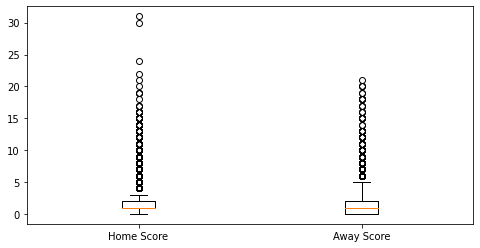

In [56]:
fig = plt.figure(figsize =(8, 4));
plt.boxplot([df["home_score"],df["away_score"]]);
plt.xticks([1,2], ["Home Score", "Away Score"]);

Boxplot says there are many outliers.

Let's remove those outlier,It will make our Machine Learning model more accurate.

Asume maximum goals that one team can score is 15

> In reality, some matches score more than 15 goals by one team. For that scenario, we have little data. To increase model accuracy and avoid wrong predictions, we assume the maximum number of goals as 15



In [57]:
higher_home=15
higher_away=15
df=df[(df["home_score"]<higher_home) & (df["away_score"]<higher_away)]
df.head(5)
# Dataset after removing outliers

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [58]:
# Making a new colum named "Win_Statues" to store the result(Win,Lost,Draw) of the home team

conditions  = [df["home_score"] ==df["away_score"], df["home_score"] > df["away_score"] , df["home_score"] < df["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
df["Win_Statues"] = np.select(conditions, choices)
df.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


In [59]:
# see what are the Countries in the dataset

countries=df.home_team.unique()
print(f"There are {len(countries)} Countries in the home_team Column\n")
print(f"Countries-{countries}")

There are 306 Countries in the home_team Column

Countries-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Paraguay' 'Japan' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece'
 'CuraÃ§ao' 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname'
 'French Guiana' 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis'
 'Panama' 'Slovakia' 'Manchukuo' 'Croatia' 'Nicaragua' 'Afgha

**Type of the Matches**

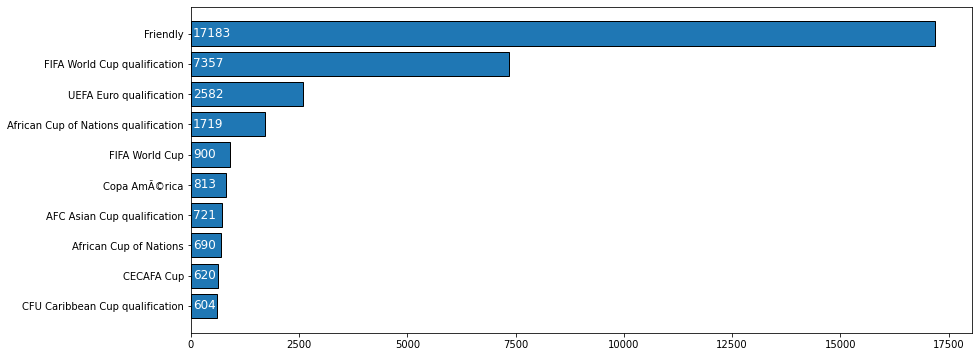

In [60]:
rank_bound = 10
ax = df.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Teams played most Matches**

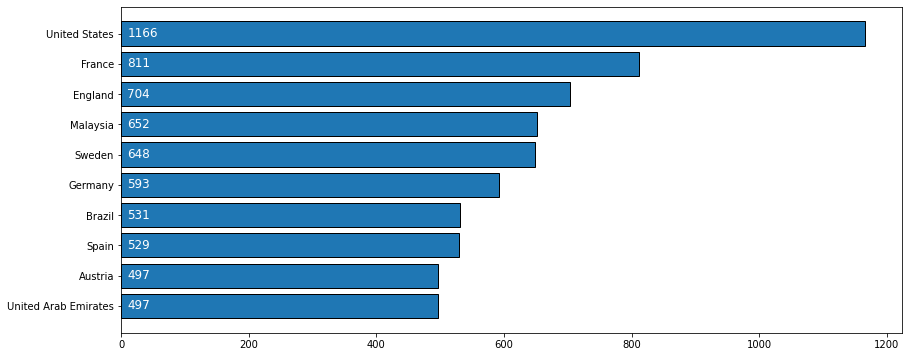

In [61]:
rank_bound = 10
ax = df.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

**Number of Matches played in equal intervals**

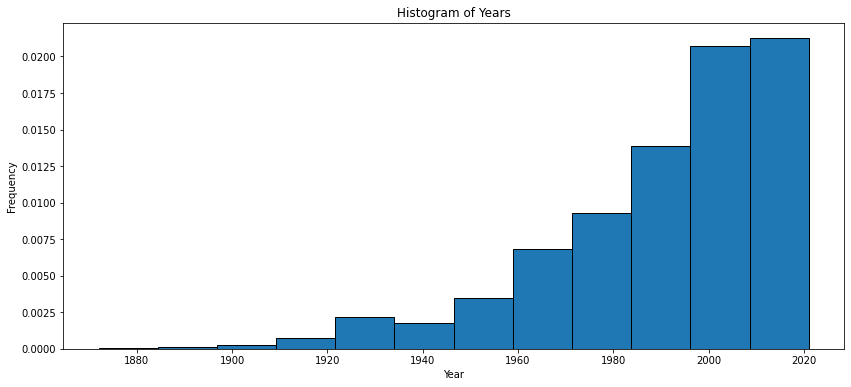

In [62]:
years = []
for date in df.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(14,6))
plt.hist(years, density=True, bins=12, edgecolor="k")
plt.title("Histogram of Years")
plt.ylabel("Frequency")
plt.xlabel("Year")
plt.show()

Most matches are played after 1960

### Finding out the impact hosting a major tournament helps a country's chances in winning matches?

Now take the rows that home_team == Country 

And romove the data of friendly matches

In [63]:
data_home=df.loc[df["home_team"]==df["country"]]
data_home=df.loc[df["tournament"] != "Friendly"]
data_home.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,Lost
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,Win
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,Lost
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,Win
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,Lost


**How home team performs in tournament matches**

In [64]:
tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(10)
tournament_df.style.bar(color="brown",subset=["Draw","Lost","Win","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,5388,7111,12350,24849
FIFA World Cup qualification,1570,2000,3787,7357
UEFA Euro qualification,506,815,1261,2582
African Cup of Nations qualification,418,353,948,1719
FIFA World Cup,199,290,411,900
Copa AmÃ©rica,172,225,416,813
AFC Asian Cup qualification,123,174,424,721
African Cup of Nations,193,186,311,690
CECAFA Cup,147,185,288,620


**Home team results**

<Figure size 432x288 with 0 Axes>

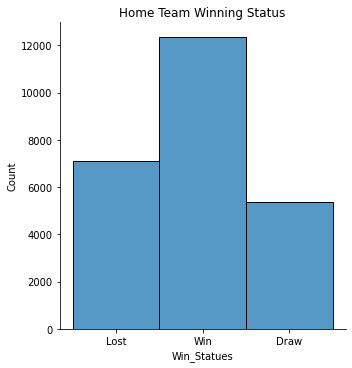

In [65]:
plt.figure(figsize=(6,4));
sns.displot(data_home, x="Win_Statues");
plt.title("Home Team Winning Status");

In [66]:
data_home['Win_Statues'].value_counts()

Win     12350
Lost     7111
Draw     5388
Name: Win_Statues, dtype: int64

**How each team perform while playing a tournament in home ground**s

Lets take teams which plays atleast 200 games

In [67]:
teams_win_statues=pd.crosstab(df["home_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_win_statues["team_win_probability"]=teams_win_statues["Win"]/(teams_win_statues["Total"])

teams_win_statues_100=teams_win_statues.loc[teams_win_statues["Total"]>200]
teams_win_statues_100=teams_win_statues_100.sort_values("team_win_probability",ascending=False)
teams_win_statues_100.head(20).style.bar(color="orange",subset="team_win_probability")

Win_Statues,Draw,Lost,Win,Total,team_win_probability
home_team,,,,,
Brazil,108,56,406,570,0.712281
Spain,66,49,249,364,0.684066
Argentina,120,68,362,550,0.658182
Ivory Coast,64,35,175,274,0.638686
Iran,61,42,177,280,0.632143
Nigeria,67,33,171,271,0.630996
Egypt,68,74,239,381,0.627297
Italy,119,49,281,449,0.625835
Germany,109,84,320,513,0.623782


We can see teams has more than 50% wining probability while playing in the home grounds 

**Teams playing in away conditions**

Lets take teams which plays atleast 200 games

In [68]:
teams_away_statues=pd.crosstab(df["away_team"], df["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues["team_win_probability"]=teams_away_statues["Lost"]/(teams_away_statues["Total"])

teams_away_statues_100=teams_away_statues.loc[teams_away_statues["Total"]>200]
teams_away_statues_100=teams_away_statues_100.sort_values("team_win_probability",ascending=False)
teams_away_statues_100.rename(columns={'Lost': 'Win'}, index={'Win': 'Lost'}, inplace=True)
teams_away_statues_100.head(20)

Win_Statues,Draw,Win,Win,Total,team_win_probability
away_team,,,,,
Brazil,91,223,101,415,0.537349
Germany,89,240,119,448,0.535714
England,134,266,115,515,0.516505
Spain,97,162,82,341,0.475073
South Korea,110,177,109,396,0.446970
Netherlands,81,163,129,373,0.436997
Russia,115,175,111,401,0.436409
Iran,67,96,57,220,0.436364
Japan,53,111,93,257,0.431907


*The probability to wining a tournament in away conditions is very low comapred to the winning probalities in home conditions*

**Making a plot to identify wining possibilities in both home and away conditions**

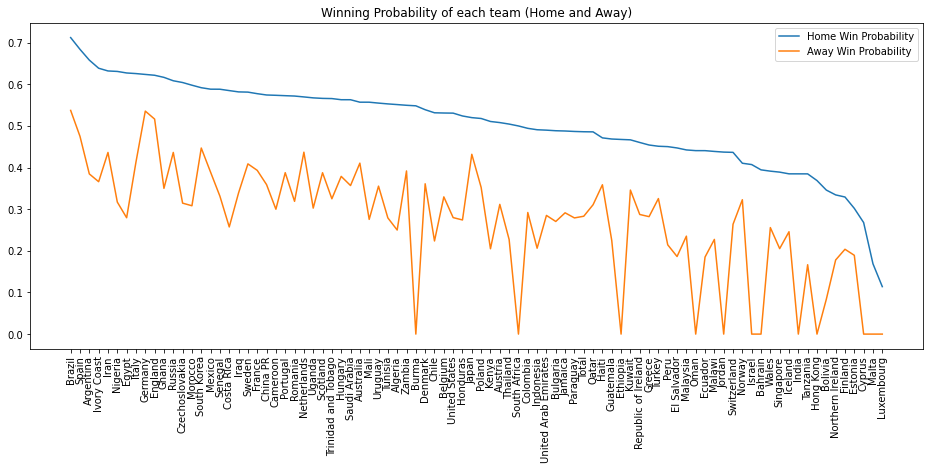

In [70]:
win_prob={teams_win_statues_100.iloc[i,:].name:[teams_win_statues_100.iloc[i,4]] for i in range(teams_win_statues_100.shape[0])}
for i in range(teams_away_statues_100.shape[0]):
    try:
        win_prob[teams_away_statues_100.iloc[i,:].name].append(teams_away_statues_100.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(16,6))
plt.plot(country_names,lst_home, label = "Home Win Probability")
plt.plot(country_names, lst_away, label = "Away Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team (Home and Away)")
plt.legend()
plt.show()

Blue line is alway above the yellow line,showing home winning possibilies are always higher.

**Finally by analysing the data, we can identify that the home team has a clear edge while playing a tournament in their home grounds**



### Finding Most Succesful Team

**Finding the team which performs best in home conditions each year interval**

**Home Conditions**

> Convert the data set into 10 terms and findsout who has done best at each term

In [71]:
range_years= max(years)-min(years)
no_0f_terms= 10
term_size= int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start= years.index(term_size*i+min(years))
    end= years.index(min(term_size*(i+1)+min(years),2021))
    term= df.iloc[start:end]
    best_teams= pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 20 games
    best_teams["team_win_probability"]= best_teams["Win"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    if (best_teams.shape[0]> 2):
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")

No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      1 |      3 |    18 |      22 |               0.818182 |
| Scotland    |      3 |      3 |    16 |      22 |               0.727273 |

Best 2 team in the term: 1900-1914 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |      1 |    14 |      21 |               0.666667 |
| Hungary     |      6 |      3 |    16 |      25 |               0.64     |

Best 2 team in the term: 1914-1928 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Denmark     |      4 |      3 |    19 |      26 |       

**Finding the team which performs best in away conditions each year interval**

**Away Conditions**
>Convert the data set into 10 terms and findsout who has done best at each term 

In [72]:
range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2021))
    term=df.iloc[start:end]
    best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
    ##Lets take teams which plays atleast 200 games
    best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
    best_teams=best_teams.sort_values("team_win_probability",ascending=False)
    best_teams=best_teams.loc[best_teams["Total"]>20]
    print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")
    if (best_teams.shape[0]>2):
        print(best_teams.iloc[0:2].to_markdown())
    else:
        print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2021)} ")


Best 2 team in the term: 1872-1886 
No Enough data to find the best team in the term: 1872-1886 

Best 2 team in the term: 1886-1900 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland    |      4 |     13 |     4 |      21 |               0.619048 |
| Total       |     11 |     30 |    44 |      85 |               0.352941 |

Best 2 team in the term: 1900-1914 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      6 |     18 |     4 |      28 |               0.642857 |
| Total       |     44 |     91 |   123 |     258 |               0.352713 |

Best 2 team in the term: 1914-1928 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      

# **FIFA World Cup 2022- QATAR**

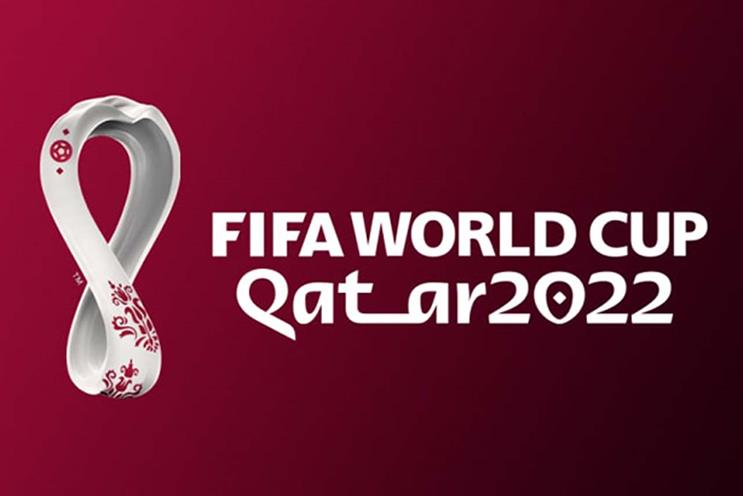

## ML Model Creation

In [73]:
df_match=df.copy() #making a copy of the main dataframe for future use
df_match.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win


*Making a new dataset with required features to train the machine learning model*

**Year, Played Country, Team_1, Team_2, Team_1 score, Team_2 score**

In [74]:
New_Dataset_part_1=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,1],df_match.values[:,2],df_match.values[:,3],df_match.values[:,4])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])

# Making a new dataset by changing the team_1 and team_2 and their respective scores
New_Dataset_part_2=pd.DataFrame(list(zip(years,df_match.values[:,7],df_match.values[:,2],df_match.values[:,1],df_match.values[:,4],df_match.values[:,3])),columns=["year","Country","team_1","team_2","team_1_score","team_2_score"])
New_Dataset=pd.concat([New_Dataset_part_1,New_Dataset_part_2],axis=0)
New_Dataset =New_Dataset.sample(frac=1).reset_index(drop=True) #Shaffling the dataset
New_Dataset.head(5)

,year,Country,team_1,team_2,team_1_score,team_2_score
0,1991,Greece,Albania,Greece,2,0
1,2014,Hungary,Finland,Hungary,2,1
2,1961,Soviet Union,Russia,Austria,0,1
3,1997,Kuwait,Kuwait,Iran,0,2
4,1985,German DR,German DR,Bulgaria,2,1


In [75]:
# Creating a list containg all the names of the countries
teams_1=New_Dataset.team_1.unique()
contries=New_Dataset.Country.unique()
all_countries=np.unique(np.concatenate((teams_1,contries), axis=0))
len(all_countries)

343

,year,team_1_score,team_2_score
year,1.000000,-0.127807,-0.127807
team_1_score,-0.127807,1.000000,-0.160107
team_2_score,-0.127807,-0.160107,1.000000


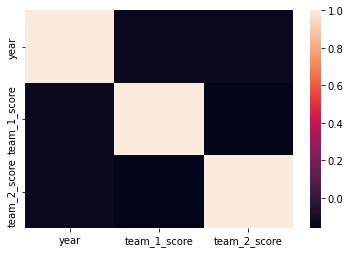

In [76]:
# Making a heatmap to see the correlation of each columns 
sns.heatmap(New_Dataset.corr())
New_Dataset.corr()

### Defining the features and labels(Targets)

X = Played Year | Host Country | Team_1 | Team_2

Y = Team_1_score | Team_2_score 

In [77]:
Y= New_Dataset.iloc[:,4:6]                      # Trainning Tragets
categorized_data=New_Dataset.iloc[:,0:4].copy() # Trainning features

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Labeling the data using LabelEncorder in Sklearn-(Giving a unique number to each string(country))

label_encoder.fit(all_countries)
#list(label_encoder.classes_)
categorized_data['team_1']=label_encoder.transform(categorized_data['team_1'])
categorized_data['team_2']=label_encoder.transform(categorized_data['team_2'])
categorized_data['Country']=label_encoder.transform(categorized_data['Country'])

# Converting these feature columns to categrize form to make the training processs more smoother
categorized_data['team_1']=categorized_data['team_1'].astype("category")
categorized_data['team_2']=categorized_data['team_2'].astype("category")
categorized_data['Country']=categorized_data['team_2'].astype("category")


In [78]:
# Input Fatures to the model (x)
categorized_data.head(5)

,year,Country,team_1,team_2
0,1991,118,2,118
1,2014,133,101,133
2,1961,18,245,18
3,1997,137,156,137
4,1985,44,111,44


In [79]:
# Targets to the model (Y)
Y.head(5)

,team_1_score,team_2_score
0,2,0
1,2,1
2,0,1
3,0,2
4,2,1


In [80]:
# Info about the X and Y dataframes
print(categorized_data.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   year     84064 non-null  int64   
 1   Country  84064 non-null  category
 2   team_1   84064 non-null  category
 3   team_2   84064 non-null  category
dtypes: category(3), int64(1)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84064 entries, 0 to 84063
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   team_1_score  84064 non-null  int64
 1   team_2_score  84064 non-null  int64
dtypes: int64(2)
memory usage: 1.3 MB
None


**Making the Model**

Here we use random forrest classifier for prediction
And Multi Output Regressor for predict multiple targets (team_1 score and team_2 score)

>Multi target Regression

> " This strategy consists of fitting one regressor per target. This is a simple strategy for extending regressors that do not natively support multi-target regression."

In [81]:
X= categorized_data
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestClassifier

model = MultiOutputRegressor(RandomForestClassifier(random_state=random_num))
model.fit(X,Y)

MultiOutputRegressor(estimator=RandomForestClassifier(random_state=85))

In [82]:
# Making the predictions
prd=model.predict(X)
prd

array([[2, 0],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [5, 0],
       [1, 1]])

### Accuracy Check

**Creating the Confusion matrix for each predictions**

In [83]:
score_team_1=[i[0] for i in prd]
score_team_2=[i[1] for i in prd]

from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(list(Y.iloc[:,0]),score_team_1)
cm2=confusion_matrix(list(Y.iloc[:,1]),score_team_2)

Text(114.0, 0.5, 'Predicted')

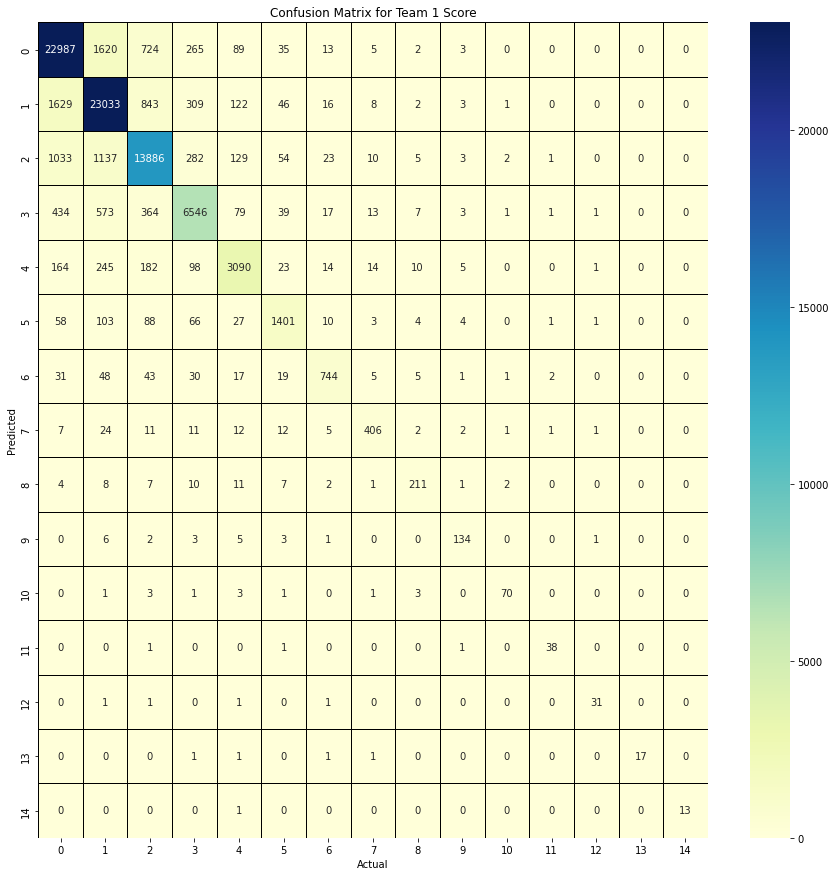

In [84]:
#Plotting the Confussion Matrix for score of team 01
plt.figure(figsize=(15,15))
sns.heatmap(cm1, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for Team 1 Score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [85]:
# Classification Report to team 1 Score
from sklearn.metrics import classification_report
report_1=classification_report(Y.iloc[:,0],score_team_1)
print(report_1)

#Has a good Accuracy in predicting the team 1 Score

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     25743
           1       0.86      0.89      0.87     26012
           2       0.86      0.84      0.85     16565
           3       0.86      0.81      0.83      8078
           4       0.86      0.80      0.83      3846
           5       0.85      0.79      0.82      1766
           6       0.88      0.79      0.83       946
           7       0.87      0.82      0.84       495
           8       0.84      0.80      0.82       264
           9       0.84      0.86      0.85       155
          10       0.90      0.84      0.87        83
          11       0.86      0.93      0.89        41
          12       0.86      0.89      0.87        35
          13       1.00      0.81      0.89        21
          14       1.00      0.93      0.96        14

    accuracy                           0.86     84064
   macro avg       0.88      0.85      0.86     84064
weighted avg       0.86   

Text(114.0, 0.5, 'Predicted')

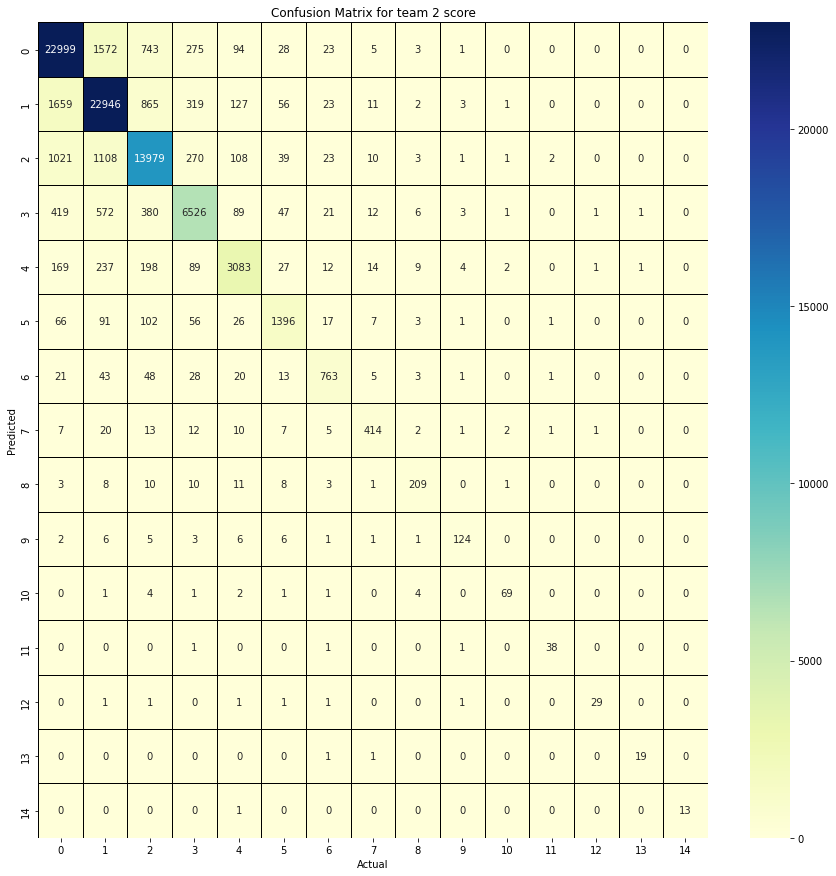

In [86]:
#Plotting the Confussion Matrix for score of team 02

plt.figure(figsize=(15,15))
sns.heatmap(cm2, annot=True,fmt="d", cmap='YlGnBu', linecolor='black', linewidths=1)
plt.title("Confusion Matrix for team 2 score")
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [87]:
#Classification Report to team 2 Score
report_2=classification_report(Y.iloc[:,1],score_team_2)
print(report_2)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     25743
           1       0.86      0.88      0.87     26012
           2       0.86      0.84      0.85     16565
           3       0.86      0.81      0.83      8078
           4       0.86      0.80      0.83      3846
           5       0.86      0.79      0.82      1766
           6       0.85      0.81      0.83       946
           7       0.86      0.84      0.85       495
           8       0.85      0.79      0.82       264
           9       0.88      0.80      0.84       155
          10       0.90      0.83      0.86        83
          11       0.88      0.93      0.90        41
          12       0.91      0.83      0.87        35
          13       0.90      0.90      0.90        21
          14       1.00      0.93      0.96        14

    accuracy                           0.86     84064
   macro avg       0.88      0.84      0.86     84064
weighted avg       0.86   

In [88]:
#Fuction to Select the winning team for the prediction array

def select_winning_team(probability_array):
    prob_lst=[round(probability_array[0][i],3) for i in range(2)]
    if (prob_lst[0]>prob_lst[1]):
        out=0
    elif (prob_lst[0]<prob_lst[1]):
        out=1
    elif (prob_lst[0]==prob_lst[1]):
        out=2
    return out,prob_lst

**Sample Prediction**

In [89]:
mactch_played=2015
team_1="Sri Lanka"
team_2="Brazil"
stadium="Qatar"

team_lst=[team_1,team_2]
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
stadium_num=label_encoder.transform([stadium])[0]

print(f"Team 01 is {team_1} -{team_1_num}")
print(f"Team 02 is {team_2} -{team_2_num}")
print(f"Played in  {stadium} -{stadium_num}")

Team 01 is Sri Lanka -281
Team 02 is Brazil -39
Played in  Qatar -237


In [90]:
# Sample Prediction Output
X_feature=np.array([[mactch_played,stadium_num,team_1_num,team_2_num]])
res=model.predict(X_feature)
win,_=select_winning_team(res)
try:
    print(f"{team_1} vs {team_2} \n {team_lst[win]} wins 🏆⚽🎯\n")
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 

Sri Lanka vs Brazil 
 Brazil wins 🏆⚽🎯



**FIFA WORLD CUP - 2022**

Every team plays with evey other team in the same group.That means one team plays 3 matches.Then the model predict who is going to win the match.
* Winning team gets 02 Point
* Match draw (Both teams scored same number of goals)- both teams get 1 points each
* Team Lost gets no points

According this points system final winner will be selected

In [91]:
Group_A= ["Qatar","Ecuador","Senegal","Netherlands"]
Group_B= ["England","Iran","United States","Wales"]
Group_C= ["Argentina","Saudi Arabia","Mexico","Poland"]
Group_D= ["France","Australia","Denmark","Tunisia"]
Group_E= ["Spain","Costa Rica","Germany","Japan"]
Group_F= ["Belgium","Canada","Morocco","Croatia"]
Group_G= ["Brazil","Serbia","Switzerland","Cameroon"]
Group_H= ["Portugal","Ghana","Uruguay","South Korea"]
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}

In [92]:
#check the contry names are same in the dataset
for group in Groups.keys():
    for country in Groups[group]:
        if country not in countries:
            print(f"{group} : {country}")

**Initialize basic parameters**

In [93]:
year=2022
stadium="Qatar"
stadium_num=label_encoder.transform([stadium])[0]
host_num=stadium_num

## Group stage Matches

In [94]:
Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"{grp_name} Matches")
    probable_countries=Groups[grp_name]
    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    for i in range(len(probable_countries)):
        j=i+1
        team_1=probable_countries[i]
        team_1_num=label_encoder.transform([team_1])[0]
        team_wins=0
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_2_num=label_encoder.transform([team_2])[0]
            team_lst=[team_1,team_2]
            Input_vector=np.array([[year,stadium_num,team_1_num,team_2_num]])
            res=model.predict(Input_vector)

            win,prob_lst=select_winning_team(res)
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]

            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  Results of the Match {res[0]}\n   {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
                print(f"{team_1} vs {team_2} \n  Results of the Match {res[0]}\n   Match Draw ⚽⚽⚽\n") 
                team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
                team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
                
                draw_dct[team_1] = draw_dct.get(team_1,0)+1
                draw_dct[team_2] = draw_dct.get(team_2,0)+1
                
                win_dct[team_1] = win_dct.get(team_1,0)
                lost_dct[team_1] = lost_dct.get(team_1,0)
                
                win_dct[team_2] = win_dct.get(team_2,0)
                lost_dct[team_2] = lost_dct.get(team_2,0)
                    
            j=j+1
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results

Group A Matches
Qatar vs Ecuador 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Qatar vs Senegal 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Qatar vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Ecuador vs Senegal 
  Results of the Match [0 0]
   Match Draw ⚽⚽⚽

Ecuador vs Netherlands 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

Senegal vs Netherlands 
  Results of the Match [2 2]
   Match Draw ⚽⚽⚽

Group B Matches
England vs Iran 
  Results of the Match [1 1]
   Match Draw ⚽⚽⚽

 England vs United States 
  Results of the Match [1 0]
   England wins 🎊🏆⚽🎖️

 England vs Wales 
  Results of the Match [1 0]
   England wins 🎊🏆⚽🎖️

 Iran vs United States 
  Results of the Match [1 0]
   Iran wins 🎊🏆⚽🎖️

 Iran vs Wales 
  Results of the Match [1 0]
   Iran wins 🎊🏆⚽🎖️

 United States vs Wales 
  Results of the Match [1 0]
   United States wins 🎊🏆⚽🎖️

Group C Matches
Argentina vs Saudi Arabia 
  Results of the Match [2 2]
   Match Draw ⚽⚽⚽

 Argentina vs Mexico 
  Res

### Display group stage results

In [95]:
for grp_name in list(Group_standings.keys()):

    team_wins_dct= dict(sorted(Group_standings[grp_name][3].items()))
    goal_scored_dct=dict(sorted(Group_standings[grp_name][4].items()))
    goal_against_dct=dict(sorted(Group_standings[grp_name][5].items()))
    
    win_dct=dict(sorted(Group_standings[grp_name][0].items()))
    draw_dct=dict(sorted(Group_standings[grp_name][1].items()))
    lost_dct=dict(sorted(Group_standings[grp_name][2].items()))
    
    lst_teams=list(team_wins_dct.keys())
    
    win_lst=list(win_dct.values())
    draw_lst=list(draw_dct.values())
    lost_lst=list(lost_dct.values())
    
    lst_win_count=list(team_wins_dct.values())
    goal_scored=list(goal_scored_dct.values())
    goal_against=list(goal_against_dct.values())
    goal_differance=[goal_scored[i]-goal_against[i] for i in range (len(goal_scored))]
    ranking_table=pd.DataFrame(list(zip(lst_teams,win_lst,draw_lst,lost_lst,goal_scored,goal_against,goal_differance,lst_win_count)),columns=["Team","Wins","Draw","Lost","Goal Scored","Goal Against","Goal Differance","Points"])
    ranking_table=ranking_table.sort_values("Points",ascending=False).reset_index(drop=True)
    ranking_table.index = ranking_table.index + 1
    print(f"\n\n{grp_name} Final Rankings")
    print(ranking_table.to_markdown())
    



Group A Final Rankings
|    | Team        |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | Ecuador     |      0 |      3 |      0 |             2 |              2 |                 0 |        3 |
|  2 | Netherlands |      0 |      3 |      0 |             4 |              4 |                 0 |        3 |
|  3 | Qatar       |      0 |      3 |      0 |             3 |              3 |                 0 |        3 |
|  4 | Senegal     |      0 |      3 |      0 |             3 |              3 |                 0 |        3 |


Group B Final Rankings
|    | Team          |   Wins |   Draw |   Lost |   Goal Scored |   Goal Against |   Goal Differance |   Points |
|---:|:--------------|-------:|-------:|-------:|--------------:|---------------:|------------------:|---------:|
|  1 | England       |      2 |      1 |      0 | 

## **Round of 16**

In [96]:
##Round of 16 Section_1
qualified_teams_1=[]
standings=list(Group_standings.keys())
i=0
print(f"Round of 16\n")
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[0][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[1][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(team_lst[win])
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_1.append(winning_team)
    i=i+2
    
##Round of 16 Section_2
qualified_teams_2=[]
standings=list(Group_standings.keys())
i=0
while i < (len(standings)):
    A_team= sorted(Group_standings[standings[i]][3].items(), key=lambda x: x[1], reverse=True)
    team_1=A_team[1][0]
    B_team= sorted(Group_standings[standings[i+1]][3].items(), key=lambda x: x[1], reverse=True)
    team_2=B_team[0][0]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Quater-Finals ⏩⏩ \n")
            qualified_teams_2.append(winning_team)
    i=i+2

Round of 16

Qatar vs Iran 
  Match Draw ⚽⚽
   Qatar wins at Penaly Shoot-Out 🥅🎯
    Qatar into the Quater-Finals ⏩⏩ 

Poland vs France 
  France wins 🏆🏆
    France into the Quater-Finals ⏩⏩ 

Germany vs Canada 
  Canada wins 🏆🏆
    Canada into the Quater-Finals ⏩⏩ 

Cameroon vs Portugal 
  Portugal wins 🏆🏆
    Portugal into the Quater-Finals ⏩⏩ 

Ecuador vs England 
  Match Draw ⚽⚽
   Ecuador wins at Penaly Shoot-Out 🥅🎯
    Ecuador into the Quater-Finals ⏩⏩ 

Argentina vs Denmark 
  Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
    Argentina into the Quater-Finals ⏩⏩ 

Japan vs Croatia 
  Match Draw ⚽⚽
   Croatia wins at Penaly Shoot-Out 🥅🎯
    Croatia into the Quater-Finals ⏩⏩ 

Brazil vs Ghana 
  Match Draw ⚽⚽
   Ghana wins at Penaly Shoot-Out 🥅🎯
    Ghana into the Quater-Finals ⏩⏩ 



In [97]:
print(f"Teams selected to the Quater Finals - {qualified_teams_1+qualified_teams_2}")

Teams selected to the Quater Finals - ['Qatar', 'France', 'Canada', 'Portugal', 'Ecuador', 'Argentina', 'Croatia', 'Ghana']


## **Quarter Finals**

In [98]:
Semifinal_teams=[]
i=0
print(f"Quater Final Matches\n")
while i < (len(qualified_teams_1))-1:
    team_1= qualified_teams_1[i]
    team_2= qualified_teams_1[i+1]
    
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽")
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2
    
i=0
while i < (len(qualified_teams_2))-1:
    team_1= qualified_teams_2[i]
    team_2= qualified_teams_2[i+1]
    team_1_num=label_encoder.transform([team_1])[0]
    team_2_num=label_encoder.transform([team_2])[0]
    team_lst=[team_1,team_2]
    
    Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
    res=model.predict(Input_vector)
    win,_=select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(team_lst[win])
            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the Semi-Finals ⏩⏩ \n")
            Semifinal_teams.append(winning_team)
    i=i+2

Quater Final Matches

Qatar vs France 
  Match Draw ⚽⚽
   France wins at Penaly Shoot-Out 🥅🎯
    France into the Semi-Finals ⏩⏩ 

Canada vs Portugal 
  Portugal wins 🏆🏆
    Portugal into the Semi-Finals ⏩⏩ 

Ecuador vs Argentina 
  Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
    Argentina into the Semi-Finals ⏩⏩ 

Croatia vs Ghana 
  Match Draw ⚽⚽
   Croatia wins at Penaly Shoot-Out 🥅🎯
    Croatia into the Semi-Finals ⏩⏩ 



In [99]:
print(f"Teams selected to the Semi-Finals - {Semifinal_teams}")

Teams selected to the Semi-Finals - ['France', 'Portugal', 'Argentina', 'Croatia']


## **Quarter Finals**

In [100]:
final_teams=[]
third_place_match_teams=[]
i=0
print(f"Semi Final Matches\n")
while i < (len(Semifinal_teams))-1:
    team_1= Semifinal_teams[i]
    team_2= Semifinal_teams[i+1]
    
    team_1_num= label_encoder.transform([team_1])[0]
    team_2_num= label_encoder.transform([team_2])[0]
    team_lst= [team_1,team_2]
    
    Input_vector= np.array([[year,host_num,team_1_num,team_2_num]])
    res= model.predict(Input_vector)
    win,_= select_winning_team(res)

    try:
            print(f"{team_1} vs {team_2} \n  {team_lst[win]} wins 🏆🏆")
            print(f"    {team_lst[win]} into the FiIFA-Finals ⏩⏩ \n")
            final_teams.append(team_lst[win])
            third_place_match_teams.append(team_lst[(win+1)%2])

            
    except IndexError:
            print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
            winning_team=random.choice(team_lst)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            print(f"    {winning_team} into the FIFA-Finals ⏩⏩ \n")
            final_teams.append(winning_team)
            team_lst.remove(winning_team)
            third_place_match_teams.append(team_lst[0])
    i=i+2
    

Semi Final Matches

France vs Portugal 
  France wins 🏆🏆
    France into the FiIFA-Finals ⏩⏩ 

Argentina vs Croatia 
  Match Draw ⚽⚽
   Croatia wins at Penaly Shoot-Out 🥅🎯
    Croatia into the FIFA-Finals ⏩⏩ 



In [101]:
print(f"Teams selected to the Finals - {final_teams}")
print(f"Teams selected to the Third Place match - {third_place_match_teams}")

Teams selected to the Finals - ['France', 'Croatia']
Teams selected to the Third Place match - ['Portugal', 'Argentina']


##**Finals and Third Place match**

In [102]:
print(f"FiIFA FINAl\n")
team_1= final_teams[1]
team_2= final_teams[0]
    
team_1_num=label_encoder.transform([team_1])[0]
team_2_num=label_encoder.transform([team_2])[0]
team_lst=[team_1,team_2]
    
Input_vector=np.array([[year,host_num,team_1_num,team_2_num]])
res=model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} are the Winners 🎉🏆🎉\n\n")
    winner=team_lst[win]
    place_2=team_lst[(win+1)%2]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} are the Winners 🎉🏆🎉\n\n")
    winner=winning_team
    
    team_lst.remove(winning_team)
    place_2=team_lst[0]

print(f"Third Place match\n")
team_1= third_place_match_teams[1]
team_2= third_place_match_teams[0]
    
team_1_num =label_encoder.transform([team_1])[0]
team_2_num =label_encoder.transform([team_2])[0]
team_lst =[team_1,team_2]
    
Input_vector =np.array([[year,host_num,team_1_num,team_2_num]])
res =model.predict(Input_vector)
win,_=select_winning_team(res)

try:
    print(f"{team_1} vs {team_2} \n  {team_lst[win]} Wins the 3rd Place 🎉🏆🎉\n")
    place_3=team_lst[win]
            
except IndexError:
    print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽") 
    winning_team=random.choice(team_lst)
    print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
    print(f"    {winning_team} Wins the 3rd Place 🎉🏆🎉\n")
    place_3 =winning_team
    

    
print(f"\n\nWinner is {winner} 🥇🥇🥇")
print(f"Runner-up is {place_2} 🥈🥈🥈")
print(f"3rd Place is {place_3} 🥉🥉🥉")

FiIFA FINAl

Croatia vs France 
  France are the Winners 🎉🏆🎉


Third Place match

Argentina vs Portugal 
  Argentina Wins the 3rd Place 🎉🏆🎉



Winner is France 🥇🥇🥇
Runner-up is Croatia 🥈🥈🥈
3rd Place is Argentina 🥉🥉🥉


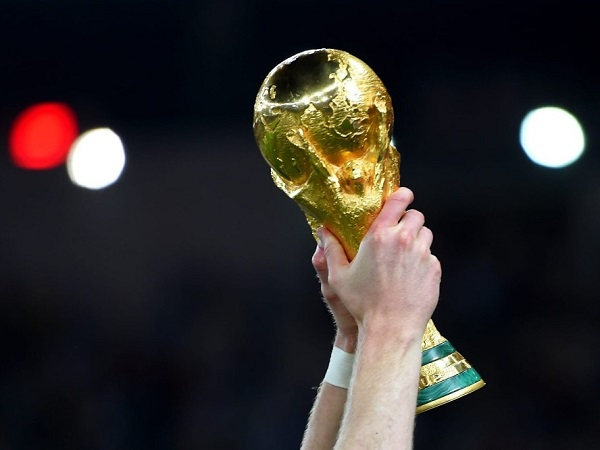

**Thank You**
